Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Define functions that load and clean the dataset

In [ ]:
# Load the data with missing values filled in
def load_data(file_path):
    labels = []
    raw_data = []
    clean_data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into tokens
            tokens = line.strip().split()

            # Extract the label and append it to the labels list
            label = int(tokens[0])
            labels.append(label)

            # Extract the features and append them to the feature_vectors list
            feature_dict = {}
            for token in tokens[1:]:
                index, value = token.split(":")
                feature_dict[int(index)] = float(value)

            # Add the features to the list
            raw_data.append(feature_dict)

        # Find the largest index
        largest_index = max(set().union(*(d.keys() for d in raw_data)))

        # Fill in missing values
        for d in raw_data:
            row = [d.get(i, 0) for i in range(1, largest_index+1)]
            clean_data.append(row)

    return labels, np.asarray(clean_data)
    

Train Linear SVM

C = 0.0625: Accuracy = 0.6833166833166833
C = 0.125: Accuracy = 0.7672327672327672
C = 0.25: Accuracy = 0.8541458541458542
C = 0.5: Accuracy = 0.906093906093906
C = 1: Accuracy = 0.9210789210789211
C = 2: Accuracy = 0.926073926073926
C = 4: Accuracy = 0.9340659340659341
C = 8: Accuracy = 0.9330669330669331
C = 16: Accuracy = 0.936063936063936
C = 32: Accuracy = 0.936063936063936
C = 64: Accuracy = 0.936063936063936


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 128: Accuracy = 0.936063936063936


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 256: Accuracy = 0.936063936063936


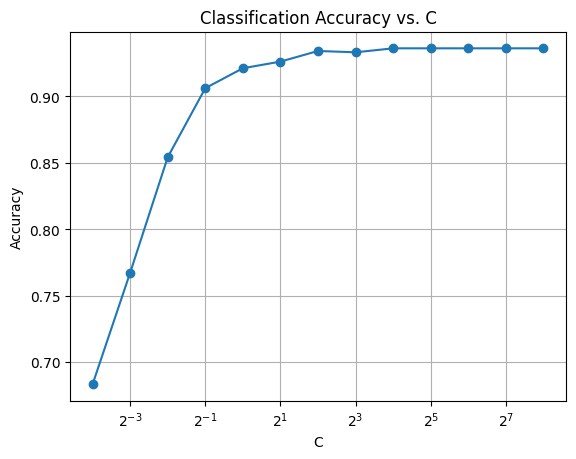

In [ ]:
# Load datasets
Ytrain, Xtrain = load_data("/content/drive/MyDrive/super_senior_year/Neural Networks/programming_3/ncrnastrain.txt")
Ytest, Xtest = load_data("/content/drive/MyDrive/super_senior_year/Neural Networks/programming_3/ncrnastest.txt")
# Calculate C values to search
C_values = [2 ** i for i in range(-4, 9)]
# Search SVMs
accuracies = []
for C in C_values:
    svm = LinearSVC(C=C, random_state=42, max_iter=10000)
    svm.fit(Xtrain, Ytrain)
    yhat = svm.predict(Xtest)
    accuracy = accuracy_score(Ytest, yhat)
    accuracies.append(accuracy)
    print(f"C = {C}: Accuracy = {accuracy}")
# Plot classification accuracy with respect to C
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log', base=2)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. C')
plt.grid()
plt.show()

Train RBF Kernel SVM

In [ ]:
#Options:
VALIDATION_SUBSETS = 5

# Reload Data (Just in case)
Ytrain, Xtrain = load_data("/content/drive/MyDrive/super_senior_year/Neural Networks/programming_3/ncrnastrain.txt")
Ytest, Xtest = load_data("/content/drive/MyDrive/super_senior_year/Neural Networks/programming_3/ncrnastest.txt")

# Split training set into training & validation
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.5, random_state=42)

# Dividing the cross-validation set into subsets
subset_size = int(Xval.shape[0] / VALIDATION_SUBSETS)
folds = [Xval[i:i + subset_size] for i in range(0, Xval.shape[0], subset_size)]

# Parameter values
c_values = [2 ** i for i in range(-4, 9)]
gamma_values = [2 ** i for i in range(-4, 9)]
results = np.zeros((len(c_values), len(gamma_values)))

# Grid Search Parameters
for c in range(len(c_values)):
    for g in range(len(gamma_values)):
        # 5-fold cross validation
        accuracies = []
        for k in range(VALIDATION_SUBSETS):
            # Extracting validation fold
            validation_fold = folds[k]
            validation_labels = Ytrain[k*subset_size : (k+1)*subset_size]
            # Extracting training folds and labels
            training_folds = np.vstack([folds[l] for l in range(VALIDATION_SUBSETS) if l != k])
            training_labels = np.hstack([Ytrain[l * subset_size:(l + 1) * subset_size] for l in range(VALIDATION_SUBSETS) if l != k])
            # Training the SVM
            clf = SVC(kernel='rbf', C=c_values[c], gamma=gamma_values[g])
            clf.fit(training_folds, training_labels)
            # Validation
            yhat = clf.predict(validation_fold)
            accuracies.append(accuracy_score(validation_labels, yhat))
        # Average cross-validation accuracy
        accuracy = np.mean(accuracies)
        print(f" C: {c}, Gamma: {g} Accuracy:{accuracy}")
        results[c, g] = accuracy

# Finding the best C and gamma values
best_c_idx, best_gamma_idx = np.unravel_index(np.argmax(results), results.shape)
best_c = c_values[best_c_idx]
best_gamma = gamma_values[best_gamma_idx]
print(f"Best C: {best_c}, Best gamma: {best_gamma}")
print("Cross-validation results matrix:")
print(results)
# Training SVM with the best C and gamma values using the whole training set
best_clf = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_clf.fit(Xtrain, Ytrain)
# Classifying the test set and showing the classification accuracy
yhat = best_clf.predict(Xtest)
test_accuracy = accuracy_score(Ytest, yhat)
print(f"Test classification accuracy: {test_accuracy}")


 C: 0, Gamma: 0 Accuracy:0.671
 C: 0, Gamma: 1 Accuracy:0.671
 C: 0, Gamma: 2 Accuracy:0.671
 C: 0, Gamma: 3 Accuracy:0.671
 C: 0, Gamma: 4 Accuracy:0.671
 C: 0, Gamma: 5 Accuracy:0.671
 C: 0, Gamma: 6 Accuracy:0.671
 C: 0, Gamma: 7 Accuracy:0.671
 C: 0, Gamma: 8 Accuracy:0.671
 C: 0, Gamma: 9 Accuracy:0.671
 C: 0, Gamma: 10 Accuracy:0.671
 C: 0, Gamma: 11 Accuracy:0.671
 C: 0, Gamma: 12 Accuracy:0.671
 C: 1, Gamma: 0 Accuracy:0.671
 C: 1, Gamma: 1 Accuracy:0.671
 C: 1, Gamma: 2 Accuracy:0.671
 C: 1, Gamma: 3 Accuracy:0.671
 C: 1, Gamma: 4 Accuracy:0.671
 C: 1, Gamma: 5 Accuracy:0.671
 C: 1, Gamma: 6 Accuracy:0.671
 C: 1, Gamma: 7 Accuracy:0.671
 C: 1, Gamma: 8 Accuracy:0.671
 C: 1, Gamma: 9 Accuracy:0.671
 C: 1, Gamma: 10 Accuracy:0.671
 C: 1, Gamma: 11 Accuracy:0.671
 C: 1, Gamma: 12 Accuracy:0.671
 C: 2, Gamma: 0 Accuracy:0.671
 C: 2, Gamma: 1 Accuracy:0.671
 C: 2, Gamma: 2 Accuracy:0.671
 C: 2, Gamma: 3 Accuracy:0.671
 C: 2, Gamma: 4 Accuracy:0.671
 C: 2, Gamma: 5 Accuracy:0.671
 C